## <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Assignment 2: AirBnB</span>

&nbsp;

<p align="center" style="font-family: Arial;color:#0e92ea;font-size:1em;">
Exploring pricing models that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.
    
</p>

##  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Contents:</span>

<ol style="font-family: Arial;color:#0e92ea;font-size:1em;">
    <li>Data Overview</li>
    <li>Data Processing</li>
    <li>Eploratory Data Analysis</li>
    <li>Feature Engineer and Outlier Treatment</li>
    <li>Model building and Evaluation</li>
    <li>Recommendations</li>
</ol>

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Setup (Import Modules):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('AirBnB.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

sns.set(color_codes=False)                                              # Displays charts with background colors
%matplotlib inline

default_color_palette = ["#03A9F4", "#FF5252", "#D50000", "#FF6F00", "#0288D1", "#7C4DFF"]
stats_colors = {'Mean':'#D50000', 'Mode':'#FF3D00', 'Median':'#2962FF'} # Set standard colors for mean, mode and median to use accross entire notebook

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 1. Data Overview:
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ea"> General Observations:
<ul>
    <li>The data is made up of 74111 rows and 11 columns.</li>
    <li>There isnt a big number of nulls so we can drop null rows.</li>
</ul>

In [2]:
print(f"Rows : {main_data.shape[0]} x Columns : {main_data.shape[1]}")

Rows : 74111 x Columns : 11


In [3]:
'''
Input:
Pandas DataFrame

Output:
Displays DataFrame structure 
(columns, nulls and non nulls counts and percentage highlighing columns with most number of nulls)

Retunrs:
N/A
'''
def info(dataFrame):
    nulls_series             = dataFrame.isna().sum()         # Get a series counting number of empty values for each column
    nonnulls_series          = dataFrame.notnull().sum()      # Get a series counting number of non empty valuesfor each column 
    nulls_percentage         = ((nulls_series * 100)/(nulls_series + nonnulls_series)).astype(float)
    column_datatypes         = dataFrame.dtypes               # Get a series containing data types for each column 

    nulls_count_df = pd.concat(
        [nulls_series, nonnulls_series, nulls_percentage, column_datatypes],
        axis=1,
        keys=["Nulls", "Non-Nulls","Nulls %", "Type"], 
        sort=True)
    cm = sns.light_palette("red", as_cmap=True)
    display(nulls_count_df.style.background_gradient(cmap=cm, subset=pd.IndexSlice[:, ['Nulls %']]).format(formatter={('Nulls %'): "{:.2f}%"}))    

In [4]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,3,74108,0.00%,float64
bathrooms,203,73908,0.27%,float64
bedrooms,92,74019,0.12%,float64
beds,131,73980,0.18%,float64
cancellation_policy,8,74103,0.01%,object
cleaning_fee,4,74107,0.01%,object
id,0,74111,0.00%,int64
instant_bookable,0,74111,0.00%,object
log_price,0,74111,0.00%,float64
review_scores_rating,16722,57389,22.56%,float64


In [5]:
# Modify the main dataframe by dropping nulls and display the results
main_data.dropna(inplace=True)

In [6]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,0,57119,0.00%,float64
bathrooms,0,57119,0.00%,float64
bedrooms,0,57119,0.00%,float64
beds,0,57119,0.00%,float64
cancellation_policy,0,57119,0.00%,object
cleaning_fee,0,57119,0.00%,object
id,0,57119,0.00%,int64
instant_bookable,0,57119,0.00%,object
log_price,0,57119,0.00%,float64
review_scores_rating,0,57119,0.00%,float64


In [7]:
np.random.seed(1)
main_data.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
52048,5456061,Entire home/apt,2.0,1.0,strict,True,t,87.0,1.0,1.0,5.298317
60050,7578455,Private room,2.0,1.0,strict,False,t,94.0,1.0,1.0,4.174387
11784,11490167,Entire home/apt,2.0,1.0,moderate,True,t,98.0,1.0,1.0,4.248495
68535,11574820,Shared room,1.0,1.0,flexible,False,f,83.0,1.0,1.0,2.708050
45511,3093469,Private room,2.0,1.0,moderate,True,t,99.0,1.0,1.0,4.248495
18041,8370658,Shared room,1.0,1.0,strict,True,f,100.0,1.0,1.0,3.912023
13181,16733827,Private room,3.0,1.0,moderate,False,f,95.0,1.0,2.0,4.762174
7225,17882017,Private room,2.0,1.0,strict,True,f,96.0,1.0,1.0,4.317488
37851,726657,Entire home/apt,3.0,1.0,strict,True,t,93.0,2.0,2.0,5.273000
810,9219613,Private room,2.0,1.0,moderate,True,t,96.0,1.0,1.0,4.499810


####  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> Check for and delete Duplicates
<ul>
    <li>Modify the main data dataframe by dropping the id column as it will make every row unique.</li>
    <li>Use the modified dataframe to count number of duplicates.</li>
</ul>

In [8]:
main_data.drop("id", axis=1, inplace=True)
main_data.duplicated().sum()

13485

In [9]:
# Count number of unique items for each column
main_data[main_data.duplicated(keep=False)].nunique(axis=0)

room_type                 3
accommodates             12
bathrooms                10
cancellation_policy       3
cleaning_fee              2
instant_bookable          2
review_scores_rating     30
bedrooms                  5
beds                      9
log_price               214
dtype: int64

In [10]:
main_data[main_data.duplicated(keep=False)]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
5,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651
7,Entire home/apt,2.0,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,Private room,2.0,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,Private room,2.0,1.0,moderate,True,t,90.0,1.0,1.0,3.583519
...,...,...,...,...,...,...,...,...,...,...
74094,Private room,2.0,1.0,strict,True,f,86.0,1.0,1.0,3.688879
74096,Private room,2.0,1.0,flexible,False,f,60.0,1.0,1.0,3.912023
74100,Private room,2.0,1.0,strict,True,f,93.0,1.0,1.0,4.605170
74103,Entire home/apt,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.135798


<p>Variation in the log price could be be becuase of a number of factors / variables not captured in the data, like Location, proximity to things like beach, Special Events, Special Amenities, High Season ect. But since we do not have that data in hand it would be safe to build a model that will predict the price with the given columns, so dropping the duplicated rows would make sense.</p>

In [11]:
# Deletes duplicates leaving the unique rows in each set of duplicates
main_data = main_data[main_data.duplicated(keep=False)].drop_duplicates()

In [12]:
main_data.duplicated().sum()

0

In [40]:
info(main_data)

,Nulls,Non-Nulls,Nulls %,Type
accommodates,0,6097,0.00%,float64
bathrooms,0,6097,0.00%,float64
bedrooms,0,6097,0.00%,float64
beds,0,6097,0.00%,float64
cancellation_policy,0,6097,0.00%,category
cleaning_fee,0,6097,0.00%,bool
instant_bookable,0,6097,0.00%,bool
log_price,0,6097,0.00%,float64
review_scores_rating,0,6097,0.00%,float64
room_type,0,6097,0.00%,category


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 2. Data Processing:
<ul>
    <li>Updated cancellation_policy and room_type from object to categorial to allow the model to generate quality analysis on the data.</li>
    <li>Fixed instant_bookable column from using string based bool values and updated the type also for quality annalysis.</li>
</ul>

In [13]:
'''
Input:
Pandas DataFrame

Output:
Go through each column and preach the name of the column and the unique values for that column.

Retunrs:
N/A
'''
def GetColUniqueValues(df):
    for col in df:
        print(f"{col} \t: {df[col].unique().tolist()}")

In [14]:
'''
Fix categirial Types and Display unique values for each categorial column.
'''
main_data['cancellation_policy']=main_data['cancellation_policy'].astype("category")
main_data['room_type']=main_data['room_type'].astype("category")

GetColUniqueValues(main_data.select_dtypes(include=['category']))

room_type 	: ['Entire home/apt', 'Private room', 'Shared room']
cancellation_policy 	: ['strict', 'moderate', 'flexible']


In [15]:
'''
Fix bool Types and Display unique values for each column.
'''
main_data.instant_bookable.replace("f", False, inplace=True)
main_data.instant_bookable.replace("t", True, inplace=True)
main_data['instant_bookable']=main_data['instant_bookable'].astype("bool")
main_data['cleaning_fee']=main_data['cleaning_fee'].astype("bool")

GetColUniqueValues(main_data.select_dtypes(include=['bool']))

cleaning_fee 	: [True, False]
instant_bookable 	: [False, True]


####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> 3. Exploratory Data Analysis:
 
<ul>
    <li>xxxxxxxxxxxxx</li>
    <li>xxxxxxxxxxxxx</li>
</ul>

In [16]:
main_data.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,6097.0,2.430704,1.145642,1.00000,2.000000,2.00000,3.000000,16.000000
bathrooms,6097.0,1.074381,0.297220,0.00000,1.000000,1.00000,1.000000,8.000000
review_scores_rating,6097.0,95.801050,5.321915,40.00000,94.000000,97.00000,100.000000,100.000000
bedrooms,6097.0,1.019846,0.485789,0.00000,1.000000,1.00000,1.000000,4.000000
beds,6097.0,1.272101,0.597126,1.00000,1.000000,1.00000,1.000000,10.000000
log_price,6097.0,4.612726,0.535596,2.70805,4.248495,4.59512,5.003946,7.090077


In [17]:
main_data.describe(include=["category"]).T

,count,unique,top,freq
room_type,6097,3,Entire home/apt,3011
cancellation_policy,6097,3,strict,2871


In [18]:
main_data.describe(include=["bool"]).T

,count,unique,top,freq
cleaning_fee,6097,2,True,4929
instant_bookable,6097,2,False,4858


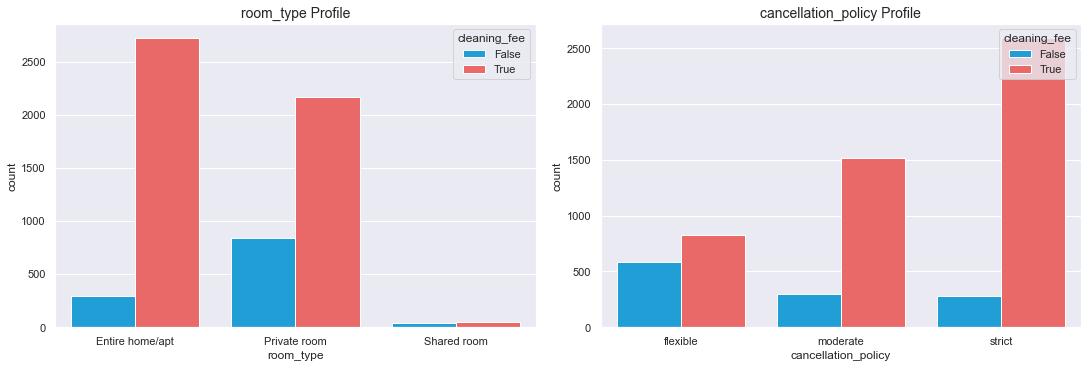

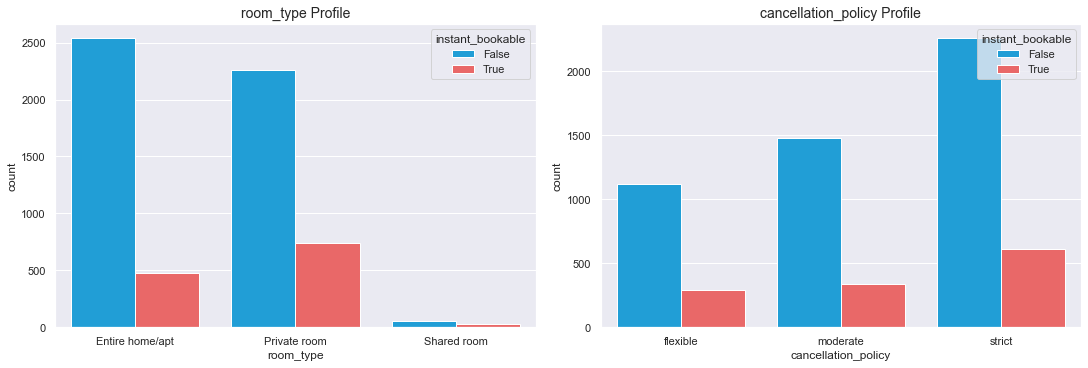

In [38]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
'''
def CountPlot(ax, x_axis, hue_name):
    ax = sns.countplot( 
        data=main_data,
        x=main_data[x_axis],
        hue=hue_name,
        palette=default_color_palette,
        ax=ax)
    ax.set_title(x_axis + ' Profile', fontsize=14)
    ax.legend(loc='upper right', title=hue_name)



col_names = main_data.select_dtypes(include=['category']).columns.tolist()
hue_names = main_data.select_dtypes(include=['bool']).columns

for hue_name in hue_names:
    fig, axs = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(15,5),
        constrained_layout=True)
    index = 0

    for ax in axs.flat:
        CountPlot(ax, col_names[index], hue_name)
        index = index + 1
    


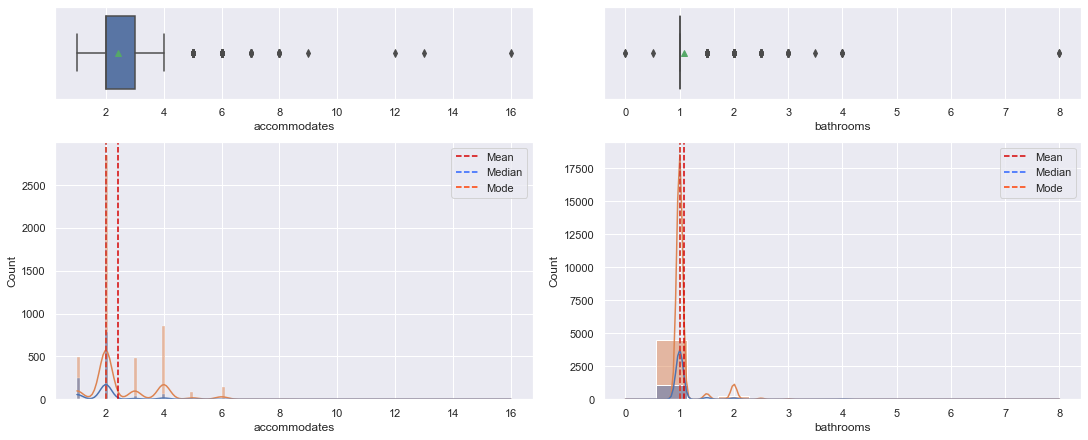

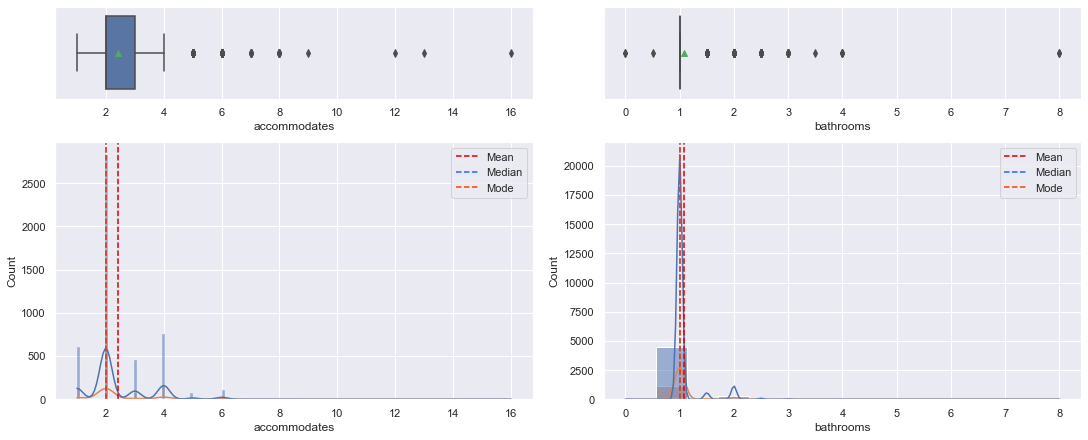

In [62]:
'''
Input:
Axis, column name/x-axis, hue name

Output:
Displays a count plot.

Retunrs:
N/A
'''
def HistBoxplot(box_chart_ax, hist_chart_ax, x_axis, hue_name):
    sns.boxplot(
        data=main_data,
        x=main_data[x_axis],
        showmeans=True,
        hue=hue_name,
        ax=box_chart_ax)
    
    sns.histplot(
        data=main_data,
        x=main_data[x_axis],
        kde=True,
        hue=hue_name,
        ax=hist_chart_ax)
    
    hist_chart_ax.axvline(main_data[x_axis].mean(),                 # Get the mean of the values in the given column and draw a vertical line that cuts the chart on the mean value 
               color=stats_colors['Mean'],                                  # Use on of the colors predefined on this notebook
               label='Mean',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].median(),               # Plot the median line on the chart.
               color=stats_colors['Median'],                                # Use on of the colors predefined on this notebook
               label='Median',                                              # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.axvline(main_data[x_axis].mode()[0],              # Plot the mode line on the chart.
               color=stats_colors['Mode'],                                  # Use on of the colors predefined on this notebook 
               label='Mode',                                                # Set the label to be diplayed on the legend
               linestyle="dashed");                                         # Make the line have dashes
    
    hist_chart_ax.legend(loc='upper right')



col_names = main_data.select_dtypes(include=['float']).columns.tolist()
hue_names = main_data.select_dtypes(include=['bool']).columns

for hue_name in hue_names:
    fig, (box, hist) = plt.subplots(
        nrows=2,                                                                # Number of rows of the grid
        ncols=2,                                                                # Number of columns of the grid.
        figsize=(15,6),       
        gridspec_kw={"height_ratios" : (0.25,0.7)},
        constrained_layout=True) 
    index = 0

    for ax in axs.flat:
        HistBoxplot(box.flat[index], hist.flat[index], col_names[index], hue_name)
        index = index + 1